# Neuromatch Academy 2020, W2D2 Tutorial 2

# Markov Processes

**DRAFT: 2020-06-29**, Bing Wen Brunton

with contributions by Ellie Strandquist

#Tutorial Objectives

In this tutorial, we will look at the dynamical systems introduced in the first tutorial through a different lens. 

In Tutorial 1, we studied dynamical systems as a deterministic process. For Tutorial 2, we will look at **probabilistic** dynamical systems. You may sometimes hear these systems called _stochastic_. In a probabilistic process,elements of randomness are involved. Every time you observe some probabilistic dynamical system, started from the same initial conditions, the outcome will likely be different. Put another way, dynamical systems that involve probability will incorporate random variations in their behavior. 

For probabilistic dynamical systems, the differential equations express a relationship between $\dot{x}$ and $x$ at every time $t$, so that the direction of $x$ at _every_ time depends entirely on the value of $x$. Said a different way, knowledge of the value of the state variables $x$ at time t is _all_ the information needed to determine $\dot{x}$ and therefore $x$ at the next time.

This property --- that the present state entirely determines the transition to the next state --- is what defines a **Markov process** and systems obeying this property can be described as **Markovian**.

The goal of Tutorial 2 is to consider this type of Markov process in a simple example where the state transitions are probabilistic. In particular, we will:

* Understand Markov processes and history dependence.
* Explore the behavior of a two-state telegraph process and understand how its equilibrium distribution is dependent on its parameters.



# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
#@title Figure Settings
%matplotlib inline
fig_w, fig_h = (8, 6)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h),'font.size': 16})
%config InlineBackend.figure_format = 'retina'

In [3]:
#@title Helper Functions

def plot_switch_simulation(t, x):
  fig = plt.figure(figsize=(fig_w, fig_h))
  plt.plot(t, x)
  plt.title('State-switch simulation')
  plt.xlabel('Time')
  plt.xlim((0, 300)) # zoom in time
  plt.ylabel('State of ion channel 0/1', labelpad=-60)
  plt.yticks([0, 1], ['Closed (0)', 'Open (1)'])
  plt.show()
  return

def plot_interswitch_interval_histogram(inter_switch_intervals):
  fig = plt.figure(figsize=(fig_w, fig_h))
  plt.hist(inter_switch_intervals)
  plt.title('Inter-switch Intervals Distribution')
  plt.ylabel('Interval Count')
  plt.xlabel('time')
  plt.show()

def plot_state_probabilities(time, states):
  fig = plt.figure(figsize=(fig_w, fig_h))
  plt.plot(time, states[:,0], label='Closed to open')   
  plt.plot(time, states[:,1], label='Open to closed')   
  plt.legend()  
  plt.xlabel('time')
  plt.ylabel('prob(open OR closed)')

# Part A:  Telegraph Process

Video available at https://youtu.be/d0FHbuNf23k


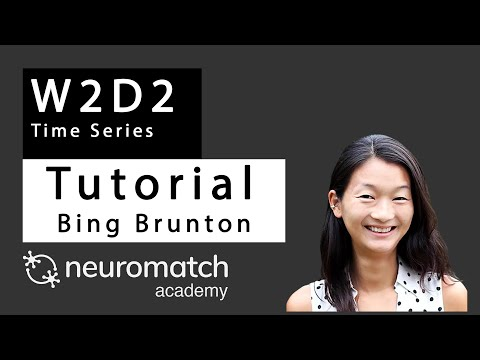

In [4]:
#@title Video 1 
# Insert the ID of the corresponding youtube video
from IPython.lib.display import IFrame
class BiliVideo(IFrame):
    def __init__(self, id, page=1, width=400, height=300, **kwargs):
        self.id=id
        src = "//player.bilibili.com/player.html?bvid={0}&page={1}".format(id, page)
        super(BiliVideo, self).__init__(src, width, height, **kwargs)

video = BiliVideo(id='BV1F5411e7Wp', width=854, height=480, fs=1)
print("Video available at https://www.bilibili.com/video/{0}".format(video.id))
video

We can run this simulation many times and gather empirical distributions of open/closed states. Alternatively, we can formulate the exact same system probabilistically, keeping track of the probability of being in each state.

<!-- Although the system started initially in the Closed ($x=0$) state, over time, it settles into a equilibrium distribution where we can predict on what fraction of time it is Open as a function of the $\mu$ parameters.  -->

(see diagram in lecture)

The same system of transitions can then be formulated using a vector of 2 elements as the state vector and a dynamics matrix $\mathbf{A}$. The result of this formulation is a *state transition matrix*:

$\left[ \begin{array}{c} C \\ O \end{array} \right]_{k+1} = \mathbf{A} \left[ \begin{array}{c} C \\ O \end{array} \right]_k = \left[ \begin{array} & 1-\mu_{\text{c2o}} & \mu_{\text{c2o}} \\ \mu_{\text{o2c}} & 1-\mu_{\text{o2c}} \end{array} \right] \left[ \begin{array}{c} C \\ O \end{array} \right]_k$.


Each transition probability shown in the matrix is as follows:
1. $1-\mu_{\text{c2o}}$, the probability that the closed state remains closed. 
2. $\mu_{\text{c2o}}$, the probability that the closed state transitions to the open state.
3.  $\mu_{\text{o2c}}$, the probability that the open state transitions to the closed state. 
4. $1-\mu_{\text{o2c}}$, the probability that the open state remains open. 


_Notice_ that this system is written as a discrete step in time, and $\mathbf{A}$ describes the transition, mapping the state from step $k$ to step $k+1$. This is different from what we did in the exercises above where $\mathbf{A}$ had described the function from the state to the time derivative of the state.


## Exercise 2B: Probability Propagation

Complete the code below to simulate the propagation of probabilities of closed/open of the ion channel through time. A variable called `x_kp1` (short for, $x$ at timestep $k$ plus 1) should be calculated per each step *k* in the loop. However, you should plot $x$.

In [13]:
# parameters
T = 500     # total Time duration
dt = 0.1   # timestep of our simulation
t = np.arange(0, T, dt)

# same parameters as above
# c2o: closed to open rate
# o2c: open to closed rate
c2o = 0.02
o2c = 0.1
A = np.array([[1 - c2o*dt, o2c*dt],
              [c2o*dt,     1 - o2c*dt]])

# initial condition: start as Closed
x0 = np.array([[1, 0]]) 
# x will be our array to keep track of x through time
x = x0

for k in range(len(t)-1):
    ###################################################################
    ## TODO: Insert your code here to compute x_kp1 (x at k plus 1)
    ##
    ## hint: use np.dot(a, b) function to compute the dot product
    ##       of the transition matrix A and the last state in x
    ###################################################################   
    
    # x_kp1 = ...

    # Stack this new state onto x to keep track of x through time steps
    # x = ...

    # Remove the line below when you are done
    pass

# Uncomment this to plot the probabilities
# plot_state_probabilities(t, x)

(5000, 2) (5000,)


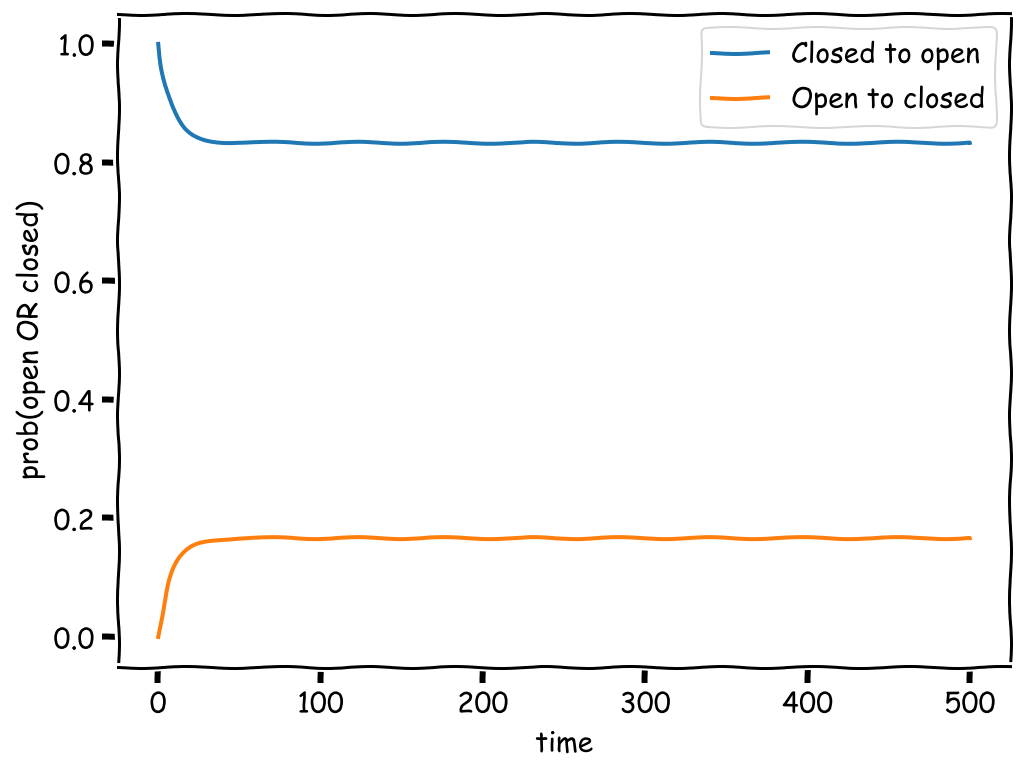

In [14]:
# to_remove solution

# parameters
T = 500     # total Time duration
dt = 0.1   # timestep of our simulation
t = np.arange(0, T, dt)

# same parameters as above
# c2o: closed to open rate
# o2c: open to closed rate
c2o = 0.02
o2c = 0.1
A = np.array([[1 - c2o*dt, o2c*dt],
              [c2o*dt,     1 - o2c*dt]])

# initial condition: start as Closed
x0 = np.array([[1, 0]]) 
# x will be our array to keep track of x through time
x = x0

for k in range(len(t)-1):
    x_kp1 = np.dot(A, x[-1,:]) # remove later
    # stack this new state onto x to keep track of x through time steps
    x = np.vstack((x, x_kp1))

print(x.shape, t.shape)
with plt.xkcd():
  plot_state_probabilities(t,x)

Here, we simulated the propagation of probabilities of the ion channel's state changing through time. Using this method is useful in that we can **run the simulation once** and see **how the probabilities propagate throughout time**, rather than re-running and empirically observing the telegraph simulation over and over again. 

Although the system started initially in the Closed ($x=0$) state, over time, it settles into a equilibrium distribution where we can predict on what fraction of time it is Open as a function of the $\mu$ parameters. We can say that the plot above show this _relaxation towards equilibrium_.

Re-calculating our value of the probability of $c2o$ again with this method, we see that this matches the simulation output from the telegraph process! 



In [15]:
print("Probability of state c2o: %.3f"%(c2o / (c2o + o2c)))
x[-1,:]

Probability of state c2o: 0.167


array([0.83333333, 0.16666667])

# Part C: Equilibrium of the telegraph process


Video available at https://youtu.be/EQWXZ40_C-k


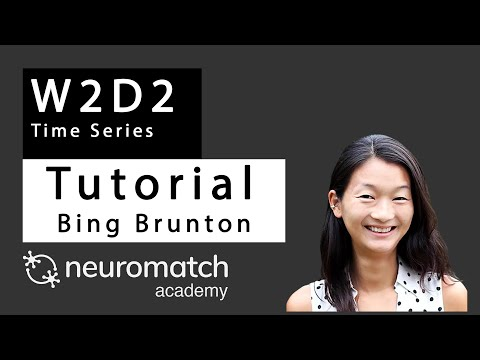

In [16]:
#@title Video 3
# Insert the ID of the corresponding youtube video
from IPython.lib.display import IFrame
class BiliVideo(IFrame):
    def __init__(self, id, page=1, width=400, height=300, **kwargs):
        self.id=id
        src = "//player.bilibili.com/player.html?bvid={0}&page={1}".format(id, page)
        super(BiliVideo, self).__init__(src, width, height, **kwargs)

video = BiliVideo(id='BV1F5411e7Wp', width=854, height=480, fs=1)
print("Video available at https://www.bilibili.com/video/{0}".format(video.id))
video

Since we have now modeled the propagation of probabilities by the transition matrix $\mathbf{A}$ in Part B, let's connect the behavior of the system at equilibrium with the eigendecomposition of $\mathbf{A}$.

As introduced in the lecture video, the eigenvalues of $\mathbf{A}$ tell us about the stability of the system, specifically in the directions of the corresponding eigenvectors.

In [17]:
# compute the eigendecomposition of A
lam, v = np.linalg.eig(A)

# print the 2 eigenvalues
print("Eigen values:",lam)

# print the 2 eigenvectors
eigenvector1 = v[:,0]
eigenvector2 = v[:,1]
print("Eigenvector 1:", eigenvector1)
print("Eigenvector 2:", eigenvector2)

Eigen values: [1.    0.988]
Eigenvector 1: [0.98058068 0.19611614]
Eigenvector 2: [-0.70710678  0.70710678]


## Exercise 2C: Finding a stable state

Which of these eigenvalues corresponds to the **stable** (equilibrium) solution? What is the eigenvector of this eigenvalue? How does that explain 
the equilibrium solutions in simulation in Part B of this tutorial?

_hint_: our simulation is written in terms of probabilities, so they must sum to 1. Therefore, you may also want to rescale the elements of the eigenvector such that they also sum to 1. These can then be directly compared with the probabilities of the states in the simulation. 

In [18]:
###################################################################
## Insert your thoughts here
###################################################################

In [19]:
# to_remove solution
"""
Discussion: 
Which of the eigenvalues corresponds to the stable solution?
What is the eigenvector of this eigenvalue?
How does that explain the equilibrium solutions in part B?

Recommendation: 
Ask the students to work in small groups (of 2 or 3) to discuss these questions.


Answers:
Whichever eigenvalue is 1 is the stable solution. There should be another
eigenvalue that is <1, which means it is decaying and goes away after the
transient period.

The eigenvector corresponding to this eigenvalue is the stable solution. 
To see this, we need to normalize this eigenvector so that its 2 elements
sum to one, then we would see that the two numbers correspond to
[P(open), P(closed)] at equilibrium -- hopefully these are exactly the
equilibrium solutions observed in Part B.


""";


# whichever eigenvalue is 1, the other one makes no sense
print(eigenvector1 / eigenvector1.sum())
print(eigenvector2 / eigenvector2.sum())

[0.83333333 0.16666667]
[-1.06150861e+15  1.06150861e+15]


# Summary

In this tutorial, we learned:

* The definition of a Markov process with history dependence.
* The behavior of a simple 2-state Markov proces--the telegraph process--can be simulated either as a state-change simulation or as a propagation of probability distributions.
* The relationship between the stability analysis of a dynamical system express either in continuous or discrete time.
* The equilibrium behavior of a telegraph process is predictable and can be understood using the same strategy as for deterministic systems in Tutorial 1: by taking the eigendecomposition of the A matrix.